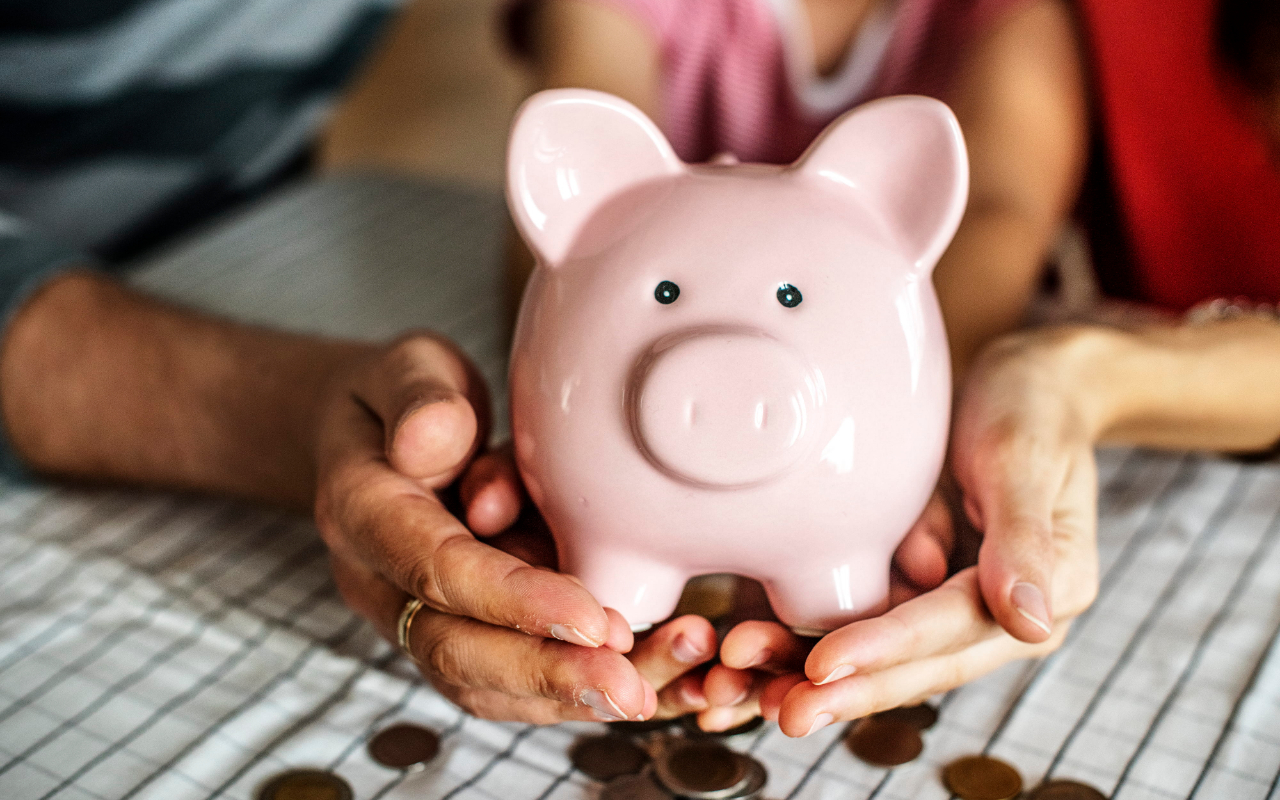

# Introduction
This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

 

**Business Understanding**
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

**All other cases**: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

**Approved**: The Company has approved loan Application

**Cancelled**: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

**Refused**: The company had rejected the loan (because the client does not meet their requirements etc.).

**Unused offer**:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

 

 

**Business Objectives**
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).



This dataset has 2 files as explained below: 

 

1. **'application_data.csv'  contains all the information of the client at the time of application.The data is about whether a client has payment difficulties.**

 

2. **'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.**

 

In [1]:
#importing important libaries for Data Manipulation and Visulizations
import pandas as pd,numpy as np,seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#for style purpose
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(font_scale=1.3)

In [3]:
#import set optons to view large outputs
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
#import warning libaries
import warnings
warnings.filterwarnings("ignore")

In [5]:
#importing dataset 1 as given by name as Application 
application = pd.read_csv('application_data.csv')


### Checking the Given Data  
> Checking the Top 5 Records

In [6]:
application.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Checking the Shape

In [7]:
application.shape #cheking the Number Of Rows and Columns
print("Number of Rows And Columns:",application.shape)

Number of Rows And Columns: (307511, 122)


### Checking the Duplicate

In [8]:
#Checking Is There Duplicated OR Not??
application.duplicated().any()

False

### Now Checking the  Information About The DataSet

In [9]:
application.info(verbose=True, buf=None, max_cols=None, memory_usage=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### Cheking the Data Type of Each Column

In [10]:
application.dtypes.to_frame()

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
AMT_CREDIT,float64
AMT_ANNUITY,float64


### Checking The Statistical Information 

In [11]:
application.describe()#checking the statstical information of Numerical data

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [12]:
application.describe(include="object")#checking the statstical information of Object data

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


### Impute/Remove missing values 

#### Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).

In [13]:
#checking the Missing Values of dataset in descending order
round((application.isnull().mean()*100),2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

<span style="color:Red"> **In Above Operations We Found there is Missing Value in Lots of Columns lets Deal With it**</span>

In [14]:
# Removing all the columns with more than 40% nulls values
_missing_col=application.columns[application.isnull().mean()>=0.4]

In [15]:
application=application.drop(_missing_col,axis=1)#droping those cloumn have more than 40% missing values

In [16]:
application.shape # checking the shape of dataset after removing the missing value 

(307511, 73)

In [17]:
(round(application.isnull().mean(),2)*100).sort_values(ascending=False).head(8).to_frame()

,0
OCCUPATION_TYPE,31.0
EXT_SOURCE_3,20.0
AMT_REQ_CREDIT_BUREAU_YEAR,14.0
AMT_REQ_CREDIT_BUREAU_QRT,14.0
AMT_REQ_CREDIT_BUREAU_MON,14.0
AMT_REQ_CREDIT_BUREAU_WEEK,14.0
AMT_REQ_CREDIT_BUREAU_DAY,14.0
AMT_REQ_CREDIT_BUREAU_HOUR,14.0


>Above Scenario We found 8 Number of Columns to Have Some missing values But in Analysis purpose I have to Imputation Only Two Columns OCCUPATION_TYPE,EXT_SOURCE_3

 **Now Filling the missing value with the mode() in OCCUPATION_TYPE because its categorical data**

In [18]:
application.OCCUPATION_TYPE.mode().to_frame()

,0
0,Laborers


In [19]:
application.OCCUPATION_TYPE=application.OCCUPATION_TYPE.fillna("Laborers")

In [20]:
application.OCCUPATION_TYPE.isnull().sum() #Now check there is no missing value

0

<span style="color:red">**Now Filling the missing value with the mean() in EXT_SOURCE_3**</span> 

In [21]:
application.EXT_SOURCE_3.value_counts().mean() #Now Filling the missing value with the mean()

302.8820638820639

In [22]:
application.EXT_SOURCE_3=application.EXT_SOURCE_3.fillna("302.87714987714986")

In [23]:
application.EXT_SOURCE_3.isnull().sum() #Now check there is no missing value

0

### Now Checking the Outliers Using Boxplot in Amount_Income_Col

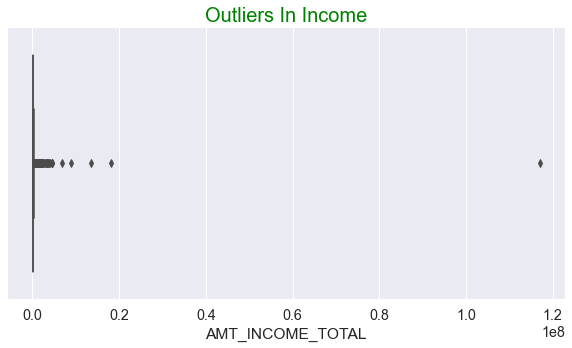

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(application.AMT_INCOME_TOTAL)
plt.title("Outliers In Income",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [25]:
application.AMT_INCOME_TOTAL.describe().to_frame()

,AMT_INCOME_TOTAL
count,3.075110e+05
mean,1.687979e+05
std,2.371231e+05
min,2.565000e+04
25%,1.125000e+05
50%,1.471500e+05
75%,2.025000e+05
max,1.170000e+08


>Clearly We Can See that the Max Salry is near about 117Million its Not Possible.

### Now Checking the Outliers Using Boxplot in DAYS_EMPLOYED colmn.

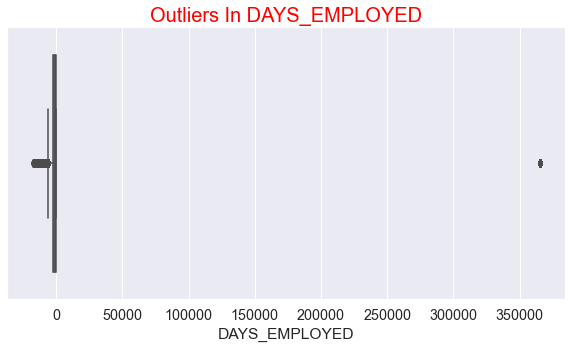

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(application.DAYS_EMPLOYED)
plt.title("Outliers In DAYS_EMPLOYED",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

In [27]:
application.DAYS_EMPLOYED.describe().to_frame()

,DAYS_EMPLOYED
count,307511.000000
mean,63815.045904
std,141275.766519
min,-17912.000000
25%,-2760.000000
50%,-1213.000000
75%,-289.000000
max,365243.000000


 <span style="color:Green">**As above we can see that there is outliers in such two columns because the point is  far way from the real data**
>See that the Standard Deviation is higher than the Mean
>See that in Statistical Information cleary the data is in Minus Top to Bottom 

### Making Code_Gender Column More Readable

**checking the CODE_GENDER and we found XNA And There is no Need For Data Manipulations of that XNA So,we can Removed**

In [28]:
application.CODE_GENDER.value_counts().to_frame()#checking the CODE_GENDER

,CODE_GENDER
F,202448
M,105059
XNA,4


**XNA Doesnot Need We can Drop these** 

In [29]:
application[application.CODE_GENDER=="XNA"] #finding XNA

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,-20232,-10044,-10024.0,-3537,1,1,1,1,1,0,Laborers,2.0,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.295998,0.461482,0.0,0.0,0.0,0.0,-286.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13717,-2797,-2241.0,-4659,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.709205,0.310818,0.0,0.0,0.0,0.0,-493.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,-10647,-1228,-183.0,-1671,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.659185,0.076984,7.0,1.0,7.0,1.0,-851.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,900000.0,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.035792,-9649,-2293,-4099.0,-2326,1,1,1,1,1,0,Laborers,2.0,2,2,FRIDAY,15,0,0,0,0,0,0,Medicine,0.658620,0.360613,10.0,4.0,10.0,4.0,-1681.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


In [30]:
application=application.drop([35657,38566,83382,189640],axis=0) #DROPING THE XNA ROWS

In [31]:
(application.CODE_GENDER.value_counts(normalize=True)*100).to_frame()# CHECK AGAIN XNA is Removed

,CODE_GENDER
F,65.835249
M,34.164751


 <span style="color:Blue">**Ploting the Pie Chart Checking the Client**</span>

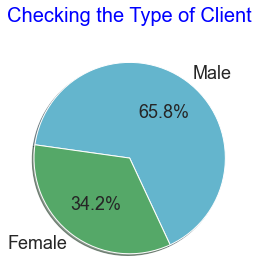

In [32]:
res1=application.CODE_GENDER.value_counts(normalize=True)
plt.title("Checking the Type of Client\n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
labels=['Male','Female']
explode = [0.05,0,0.2,0,0] # To slice the perticuler section
colors = ["c", 'g','r','y','g'] # Color of each section
textprops = {"fontsize":18} # Font size of text in pie chart

plt.pie(res1, # Values
       labels=labels, # Labels for each sections
      colors =colors, # Color of each section
        autopct='%1.1f%%', # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.1, # Radius to increase or decrease the size of pie chart 
       startangle = 295, # Start angle of first section
        textprops =textprops) 
plt.show()

<span style="color:Green">**We Observe that Female Client(66%) is More Compare to Male(34%)**</span> 

### <span style="color:blue">Checking for Imbalanced Data in Target Column</span>


In [33]:
round(application["TARGET"].value_counts(normalize=True)*100,2).to_frame()

,TARGET
0,91.93
1,8.07


**Here the data is imbalanced 0 is  payment Not difficulties 92% of client that have no issues of payments similary 1 is payment difficulties that have only 8% of client**

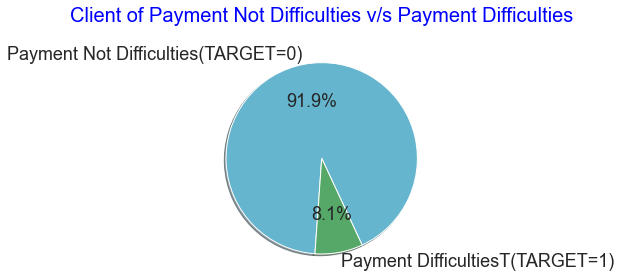

In [34]:
res=round(application["TARGET"].value_counts(normalize=True)*100,2)
labels=['Payment Not Difficulties(TARGET=0)','Payment DifficultiesT(TARGET=1)']
plt.title("Client of Payment Not Difficulties v/s Payment Difficulties\n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
explode = [0.05,0,0.2,0,0] # To slice the perticuler section
colors = ["c", 'g','r','y','g'] # Color of each section
textprops = {"fontsize":18} # Font size of text in pie chart

plt.pie(res, # Values
        labels = labels, # Labels for each sections
      # To slice the perticuler section
        colors =colors, # Color of each section
        autopct='%1.1f%%', # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.1, # Radius to increase or decrease the size of pie chart 
       startangle = 295, # Start angle of first section
        textprops =textprops) 
plt.show()

 **As We can See there is Approx(92%) of Client is Payment Not Difficulties Only 8% Client is Payment Difficulties in Given Data**

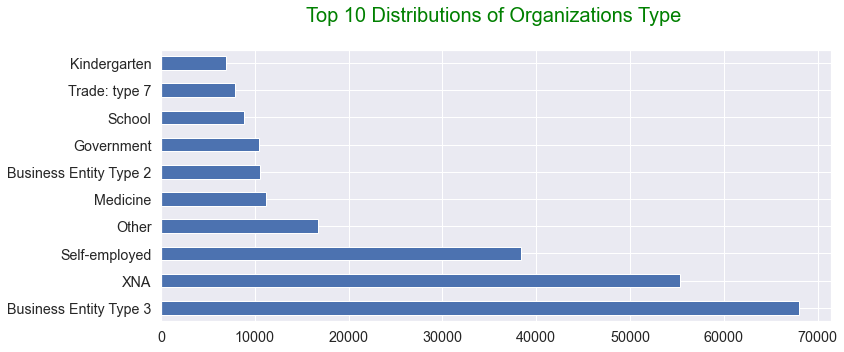

In [35]:
# To check the Top 10 Distribution of 'ORGANIZATION_TYPE'
res=application["ORGANIZATION_TYPE"].value_counts().head(10)
plt.figure(figsize=(12,5))
res.plot(kind="barh")
plt.title("Top 10 Distributions of Organizations Type \n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

> Here We Can see that top ten Organizations of Client

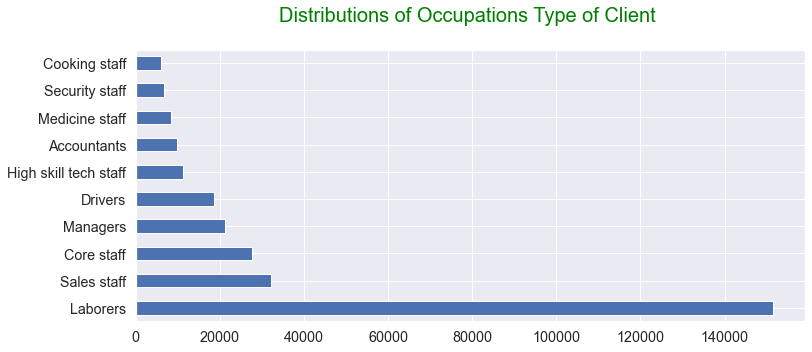

In [36]:
# To check the Distribution of 'OCCUPATION_TYPE'
res=application["OCCUPATION_TYPE"].value_counts()
plt.figure(figsize=(12,5))
res.plot(kind="barh")
plt.title("Distributions of Occupations Type of Client \n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

> Here We can see that The Labores Client are More to apply the Loan as Compared to others

### <span style="color:Green">Binning Analaysis of DAYS_BIRTH column </span>

In [37]:
#Binning DAYS_BIRTH
abs(application['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1]).to_frame()

,DAYS_BIRTH
0.0,7489.0
0.1,10284.6
0.3,13140.0
0.6,17220.0
0.8,20474.0
1.0,25229.0


In [38]:
#Creating a column AGE using DAYS_BIRTH and converting in year by dividing the 365 days 
application['AGE']=abs(application['DAYS_BIRTH'])//365

In [39]:
application['AGE'].describe().to_frame()# after creating the AGE column checking the statiscal informations

,AGE
count,307507.000000
mean,43.436055
std,11.954577
min,20.000000
25%,34.000000
50%,43.000000
75%,53.000000
max,69.000000


In [40]:
## Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 60+
application['AGE_GROUP'] = pd.cut(application['AGE'],[0,30,40,50,60,99],labels=["<30","30-40","40-50","50-60","60+"])

In [41]:
## Adding one more column that will be used for analysis later
application['CREDIT_INCOME_RATIO']=round((application['AMT_CREDIT']/application['AMT_INCOME_TOTAL']))

### Binning variables for analysis on AMT_INCOME_TOTAL

In [42]:
application['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1]).to_frame()

,AMT_INCOME_TOTAL
0.0,25650.0
0.1,81000.0
0.3,112500.0
0.6,162000.0
0.8,225000.0
1.0,117000000.0


In [43]:
#Creating A new categorical variable based on income total
application['INCOME_GROUP']=pd.qcut(application['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

 <span style="color:Blue">**Now We Have Selected 28 columns from our Applications DataSet For Analysing Because Rest of the column I dont Think Its For Analysis Purpose**</span> 

In [44]:
# From the remaining columns about 28 are selected based on their description and relevance with problem statement 
#for further analysis
Extract_28_col = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_CREDIT','AMT_INCOME_TOTAL',
'CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE',
'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE', 'AGE_GROUP', 'INCOME_GROUP']

In [45]:
NewApplication_Final=application[Extract_28_col] 

In [46]:
NewApplication_Final.shape

(307507, 28)

**As Given in Columns Descriptions(sheet) Here In Target Column 0 is Payments not difficulty 
and 1 is for payments difficulty Client**

### Creating the new dataframe one is for payments not difficulty and other is for payment difficulty new1 & new2

In [47]:
new1=NewApplication_Final[NewApplication_Final["TARGET"]==0] 
new2=NewApplication_Final[NewApplication_Final["TARGET"]==1]

**The Ratio of Data Imbalance**.

In [48]:
new1.shape # this for TARGET 0 payments not difficulty client

(282682, 28)

In [49]:
new2.shape # this for TARGET 1 payments difficulity client

(24825, 28)

In [50]:
ratio=new1.shape[0]/new2.shape[0]
ratio

11.386988922457201

>Through this ratio, we can conclude that there was almost 11 number of 0's for every 1.



### Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


### Univariate Analysis Unordered Categorical coln Name-CODE_GENDER

In [51]:
#For Payments Not Difficulty

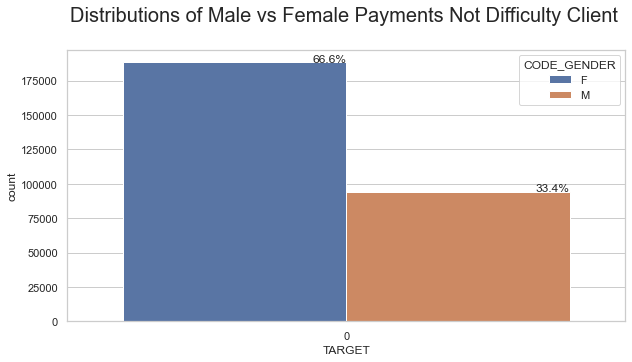

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new1))
ax = sns.countplot(x="TARGET", hue="CODE_GENDER", data=new1)
plt.title('Distributions of Male vs Female Payments Not Difficulty Client \n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

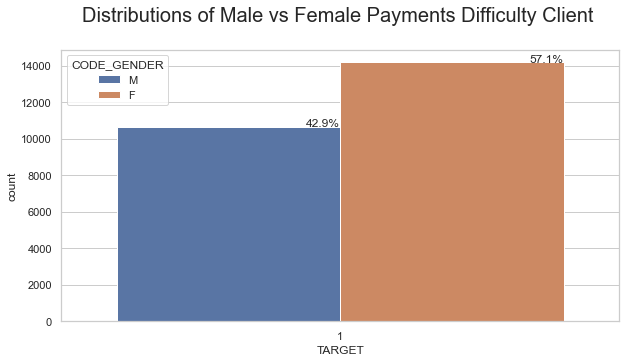

In [53]:
#For Payments Difficulty
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new2))
ax = sns.countplot(x="TARGET", hue="CODE_GENDER", data=new2)
plt.title('Distributions of Male vs Female Payments Difficulty Client \n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

> We can see that Female contribute 67% to the non-defaulters while 57% to the defaulters. We can conclude that
> <br> We see more female applying for loans than males and hence the more number of female defaulters as well. 
> <br> But the rate of defaulting of FEMALE is much lower compared to their MALE counterparts.

### Now Analysis the coln.FLAG_OWN_CAR

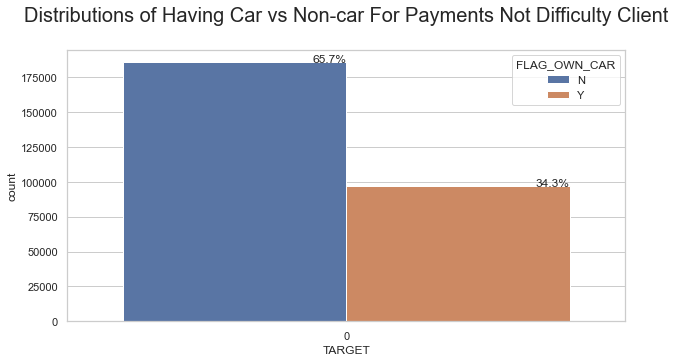

In [54]:
#For Payments Not Difficulty
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new1))
ax = sns.countplot(x="TARGET", hue="FLAG_OWN_CAR", data=new1)
plt.title('Distributions of Having Car vs Non-car For Payments Not Difficulty Client\n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

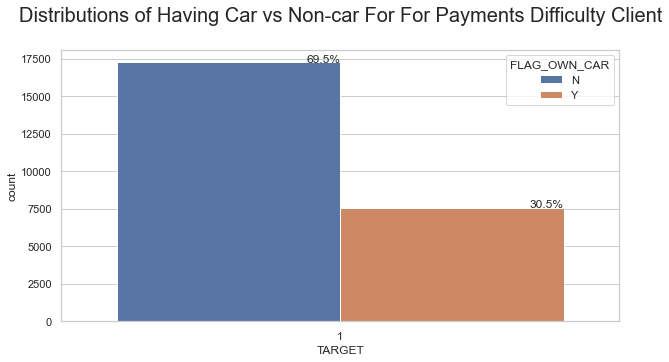

In [55]:
#For Payments Difficulty
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new2))
ax = sns.countplot(x="TARGET", hue="FLAG_OWN_CAR", data=new2)
plt.title('Distributions of Having Car vs Non-car For For Payments Difficulty Client\n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

> We can see that people with cars contribute 65.7% to the non-defaulters while 69.5% to the defaulters. We can conclude that
> <br>While people who have car default more often, the reason could be there are simply more people without cars
> <br>Looking at the percentages in both the charts, we can conclude that the rate of default of people having car is low compared to people who don't.

### Now Analysis in INCOME_GROUP colmn.

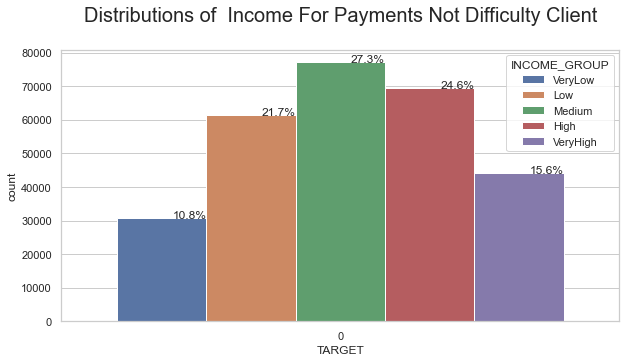

In [56]:
#For Payments Not Difficulty
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new1))
ax = sns.countplot(x="TARGET", hue="INCOME_GROUP", data=new1)
plt.title('Distributions of  Income For Payments Not Difficulty Client\n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

>We can see that the medium,high,very high and low range of salary have no issue with payments

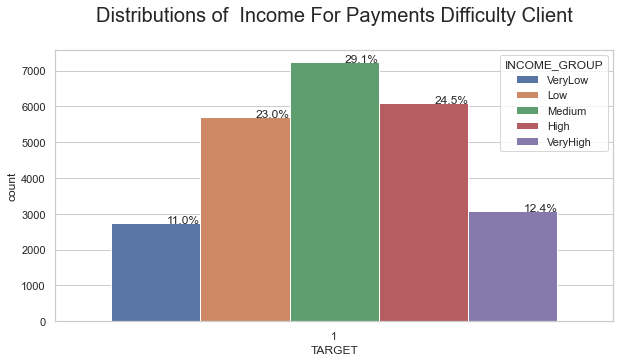

In [57]:
#For Payments Difficulty
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new2))
ax = sns.countplot(x="TARGET", hue="INCOME_GROUP", data=new2)
plt.title('Distributions of  Income For Payments Difficulty Client\n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

>Medium salary client holds more loan compare to others and they have lots of issue in payments 

### Analaysing the Income Type Of client

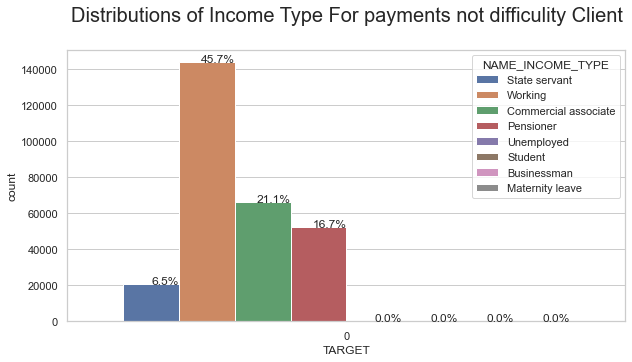

In [58]:
#For payments not difficulity
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new1))
ax = sns.countplot(x="TARGET", hue="NAME_INCOME_TYPE", data=new1)
plt.title('Distributions of Income Type For payments not difficulity Client\n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(90 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

 >Here We Can See that the Working client have not the payment issues

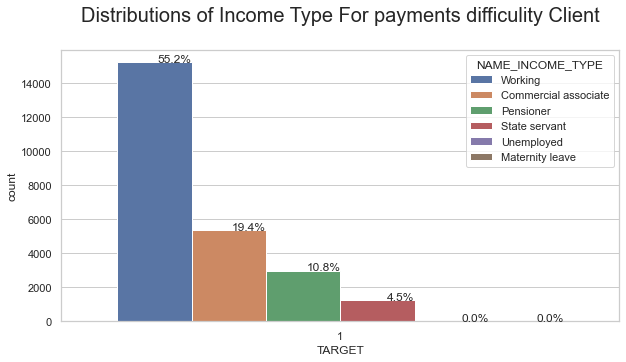

In [59]:
#For payments difficulity
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new2))
ax = sns.countplot(x="TARGET", hue="NAME_INCOME_TYPE", data=new2)
plt.title('Distributions of Income Type For payments difficulity Client\n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(90 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

>as working client have more paymenyts difficulty compared to others

### Analaysising the Eduction Type Of client

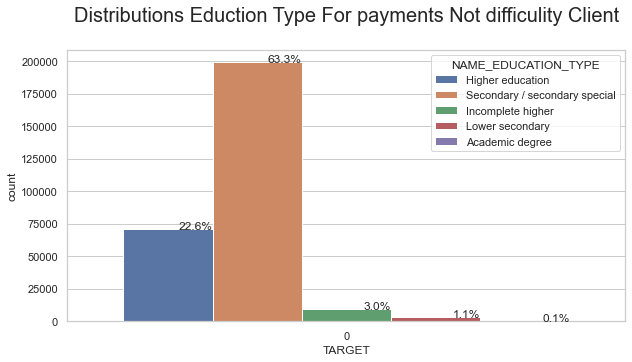

In [60]:
#For payments Not difficulity
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new1))
ax = sns.countplot(x="TARGET", hue="NAME_EDUCATION_TYPE", data=new1)
plt.title('Distributions Eduction Type For payments Not difficulity Client\n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(90 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

>secondary passing client has no issue in payment it has highest as compared to others


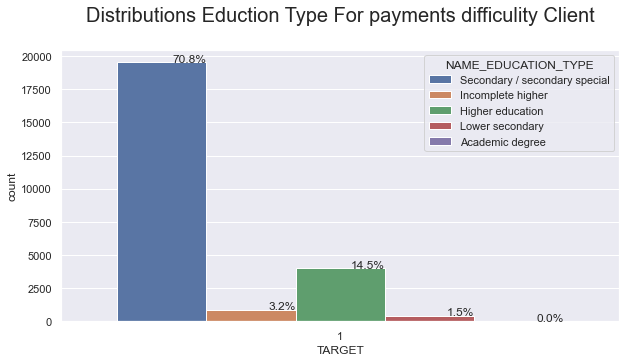

In [61]:
#For payments difficulity
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
total = float(len(new2))
ax = sns.countplot(x="TARGET", hue="NAME_EDUCATION_TYPE", data=new2)
plt.title('Distributions Eduction Type For payments difficulity Client\n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(90 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

 >Here near about 70% of lower level of eductions have payment issues
 >Those who have Academic Degree have no issue with payments

### Analysing the age group of client

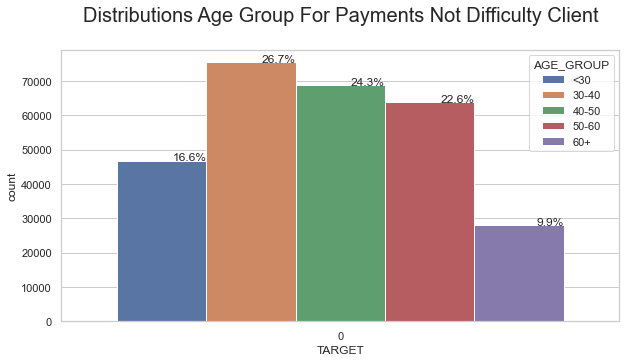

In [62]:
#For Payments Not Difficulty
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new1))
ax = sns.countplot(x="TARGET", hue="AGE_GROUP", data=new1)
plt.title('Distributions Age Group For Payments Not Difficulty Client\n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

>as we can the range of age <30,30-40,40-50 and 50-60 age having no issue in payments

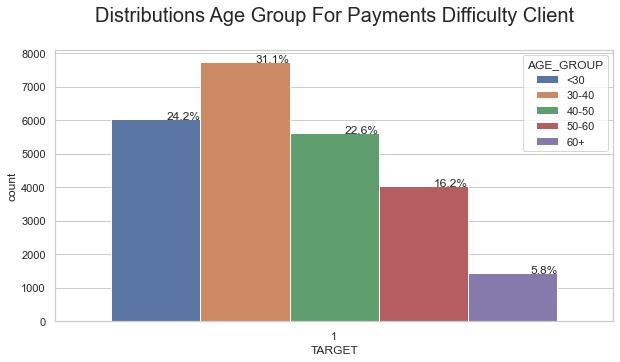

In [63]:
#For Payments Not Difficulty
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new2))
ax = sns.countplot(x="TARGET", hue="AGE_GROUP", data=new2)
plt.title('Distributions Age Group For Payments Difficulty Client\n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

 >The age group of <30,30-40 and 40-50 they have lots have issues in payments

### Analysisng the REGION_RATING_CLIENT_W_CITY

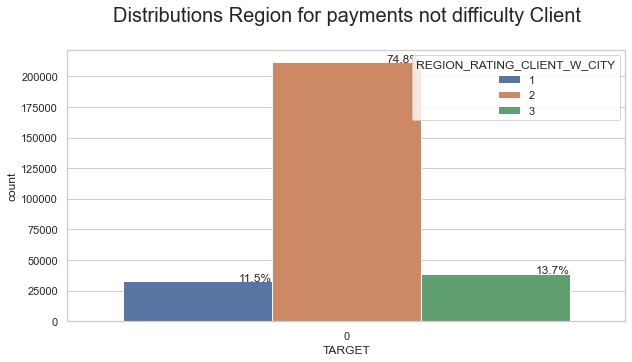

In [64]:
#for payments not difficulty

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new1))
ax = sns.countplot(x="TARGET", hue="REGION_RATING_CLIENT_W_CITY", data=new1)
plt.title('Distributions Region for payments not difficulty Client\n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

>most of the client came from region 2

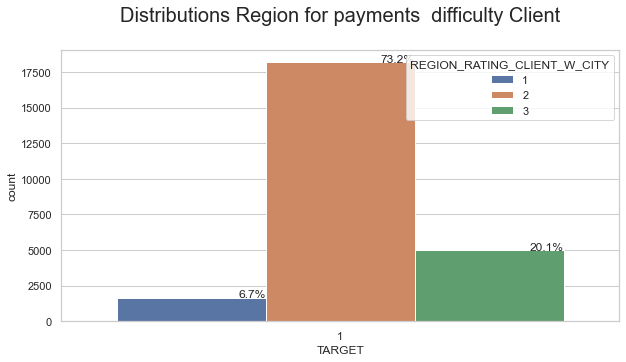

In [65]:
#for payments  difficulty

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new2))
ax = sns.countplot(x="TARGET", hue="REGION_RATING_CLIENT_W_CITY", data=new2)
plt.title('Distributions Region for payments  difficulty Client\n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

>Payments Difficulty of Region 2 client and very low client is came from region 1

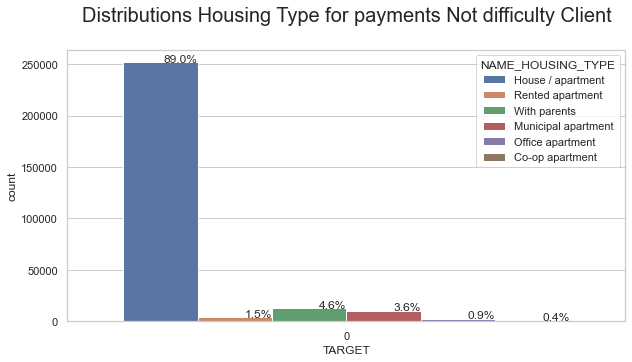

In [66]:
#for payments Not  difficulty
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new1))
ax = sns.countplot(x="TARGET", hue="NAME_HOUSING_TYPE", data=new1)
plt.title('Distributions Housing Type for payments Not difficulty Client\n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

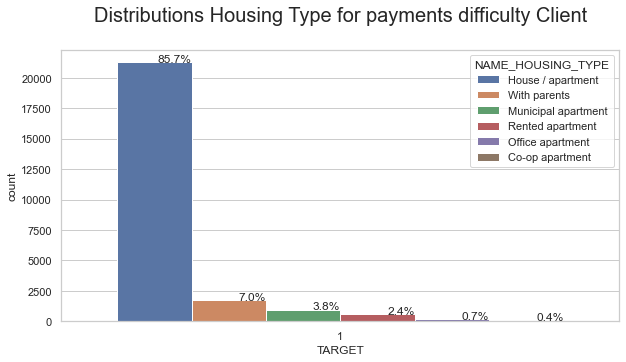

In [67]:
#for payments  difficulty

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new2))
ax = sns.countplot(x="TARGET", hue="NAME_HOUSING_TYPE", data=new2)
plt.title('Distributions Housing Type for payments difficulty Client\n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

> It is clear from the graph that people who have House/Appartment, tend to apply for more loans.
> <br>People living with parents tend to default more often when compared with others.The reason could be their living expenses are more due to their parents living with them. 

### Analyses  On CNT_FAM_MEMBERS column(How many family members does client have)

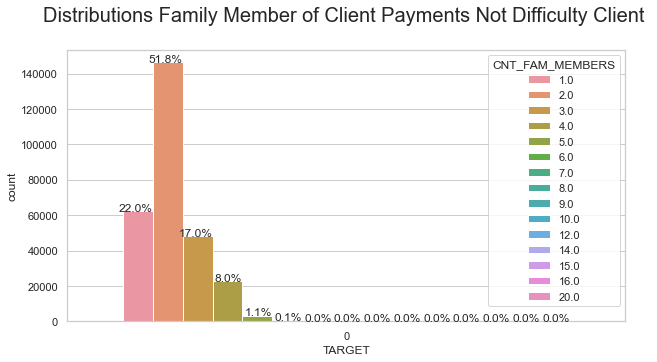

In [68]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new1))
ax = sns.countplot(x="TARGET", hue="CNT_FAM_MEMBERS", data=new1)
plt.title('Distributions Family Member of Client Payments Not Difficulty Client \n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

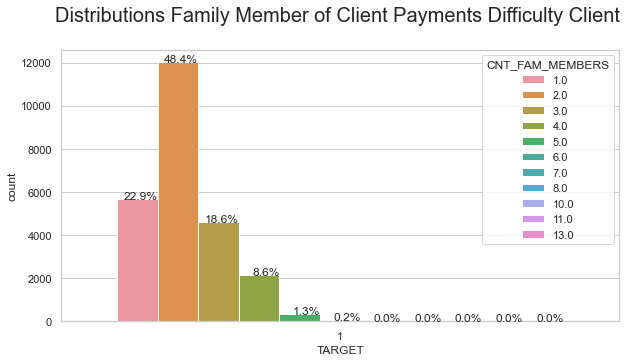

In [69]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(new2))
ax = sns.countplot(x="TARGET", hue="CNT_FAM_MEMBERS", data=new2)
plt.title('Distributions Family Member of Client Payments Difficulty Client \n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

>After Visualizations In Both Graph We can see that Client Family Member has Most of 2 members both cases 52% and 48%

### Analyses  On OCCUPATION_TYPE column

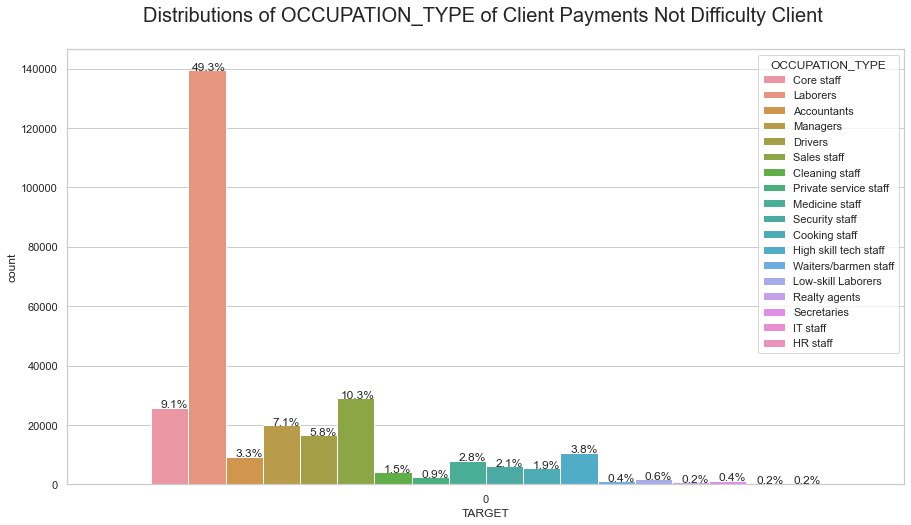

In [70]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
total = float(len(new1))
ax = sns.countplot(x="TARGET", hue="OCCUPATION_TYPE", data=new1)
plt.title('Distributions of OCCUPATION_TYPE of Client Payments Not Difficulty Client \n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

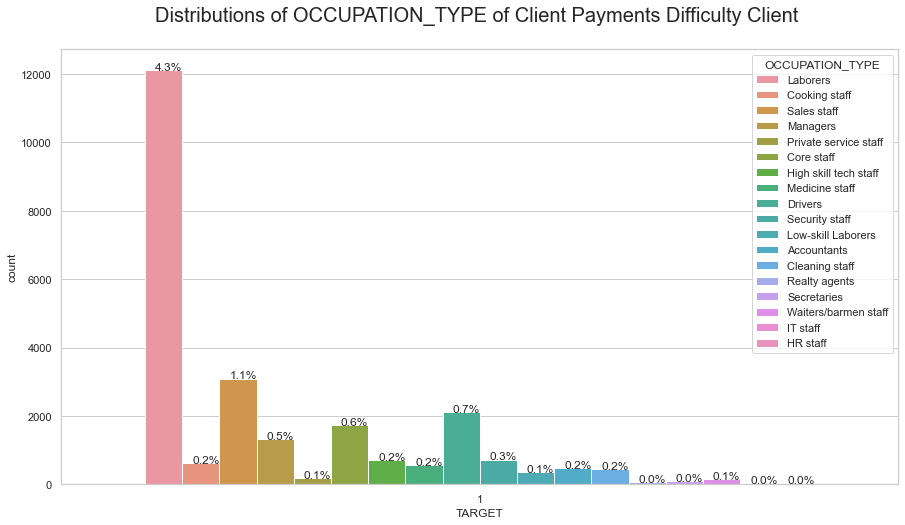

In [71]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
total = float(len(new1))
ax = sns.countplot(x="TARGET", hue="OCCUPATION_TYPE", data=new2)
plt.title('Distributions of OCCUPATION_TYPE of Client Payments Difficulty Client \n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

>In Above Visualizations We have Seen the Labours client have 49% have not issue with payments as also you can see that as increasing the occupation type so its is decreasing the percentage rate of payment issue. only 4.3% have payment related issue on labours client.


### Analysing the NAME_FAMILY_STATUS(Client Status)

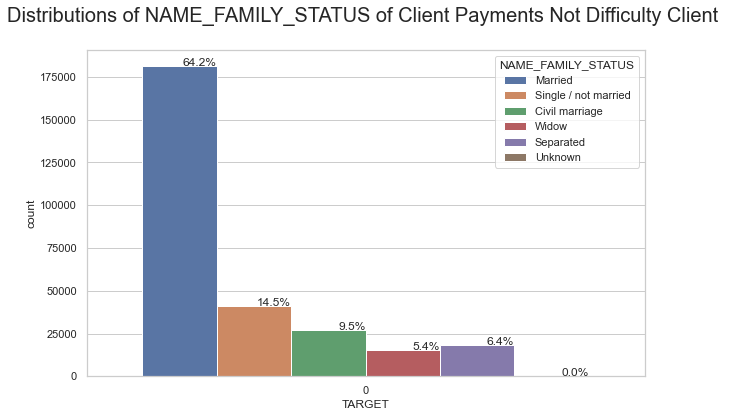

In [72]:
# Family Status of Loan-Not Payment Difficulties
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
total = float(len(new1))
ax = sns.countplot(x="TARGET", hue="NAME_FAMILY_STATUS", data=new1)
plt.title('Distributions of NAME_FAMILY_STATUS of Client Payments Not Difficulty Client \n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

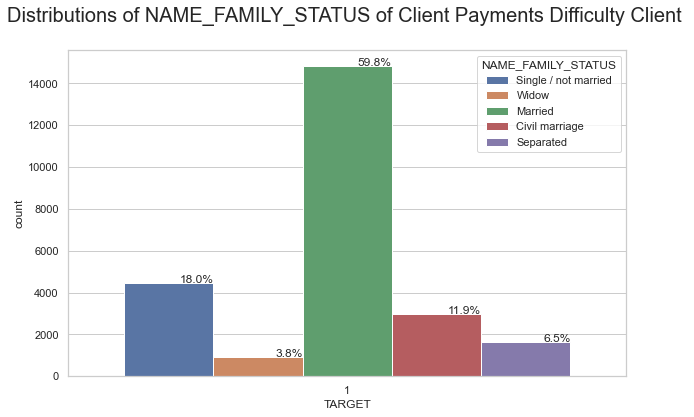

In [73]:
# Family Status of Loan Payment Difficulties
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
total = float(len(new2))
ax = sns.countplot(x="TARGET", hue="NAME_FAMILY_STATUS", data=new2)
plt.title('Distributions of NAME_FAMILY_STATUS of Client Payments Difficulty Client \n', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

>We can see that Number of married client near by 64% is not issues with payments as compared to others
but single/not married client have 18% with have payment issues.

### Top 10 Correlation Columns of new1 DataSet for Payments Not Difficulties

In [74]:
#Getting the top 10 correlation in new1
correlation_0 = new1.corr().abs().unstack().sort_values(ascending=False).dropna()
correlation_0
correlation_0 = correlation_0[correlation_0 != 1.0]
correlation_0.head(10).to_frame().reset_index()

,level_0,level_1,0
0,AMT_CREDIT,AMT_GOODS_PRICE,0.987253
1,AMT_GOODS_PRICE,AMT_CREDIT,0.987253
2,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950148
3,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950148
4,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
5,AMT_ANNUITY,AMT_GOODS_PRICE,0.776686
6,AMT_CREDIT,AMT_ANNUITY,0.771308
7,AMT_ANNUITY,AMT_CREDIT,0.771308
8,AMT_CREDIT,CREDIT_INCOME_RATIO,0.648589
9,CREDIT_INCOME_RATIO,AMT_CREDIT,0.648589


>There is showing all are in positive values so they are in Strong Relationship between the data

### Top 10 Correlation Columns of new2 DataSet for Payments  Difficulties

In [75]:
#Getting the top 10 correlation in new2
correlation_1 = new2.corr().abs().unstack().sort_values(ascending=False).dropna()
correlation_1
correlation_1 = correlation_1[correlation_1 != 1.0]
correlation_1.head(10).to_frame().reset_index()

,level_0,level_1,0
0,AMT_CREDIT,AMT_GOODS_PRICE,0.983103
1,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
2,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
3,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956637
4,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
5,AMT_ANNUITY,AMT_GOODS_PRICE,0.752699
6,AMT_ANNUITY,AMT_CREDIT,0.752195
7,AMT_CREDIT,AMT_ANNUITY,0.752195
8,AMT_CREDIT,CREDIT_INCOME_RATIO,0.639744
9,CREDIT_INCOME_RATIO,AMT_CREDIT,0.639744


>There is showing all are in positive values so they are in Strong Relationship between the data

### Bivariate and Multivariate Analysis

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

### Bivariate Analysis of Numerical Variables

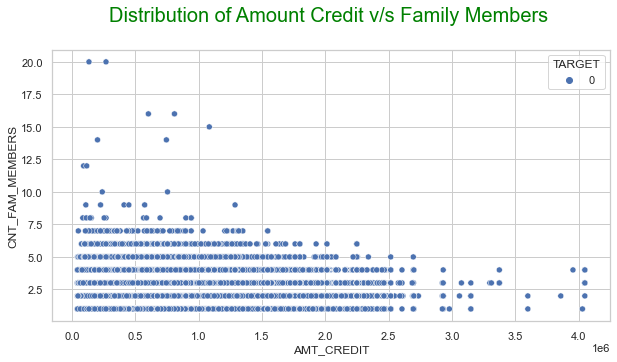

In [76]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="AMT_CREDIT",data=new1,hue="TARGET",y="CNT_FAM_MEMBERS")
plt.title("Distribution of Amount Credit v/s Family Members \n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

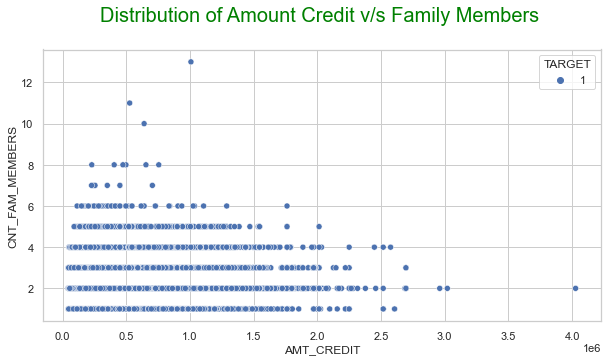

In [77]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="AMT_CREDIT",data=new2,hue="TARGET",y="CNT_FAM_MEMBERS")
plt.title("Distribution of Amount Credit v/s Family Members \n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

>We can see that the density in the lower left corner is similar in both the case, so the people are equally likely to default if the family is small and the AMT_CREDIT is low.
 We can observe that larger families and people with larger AMT_CREDIT default less often

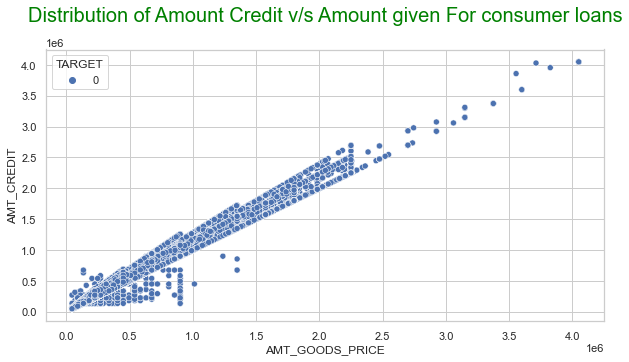

In [78]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="AMT_GOODS_PRICE",data=new1,hue="TARGET",y="AMT_CREDIT")
plt.title("Distribution of Amount Credit v/s Amount given For consumer loans\n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

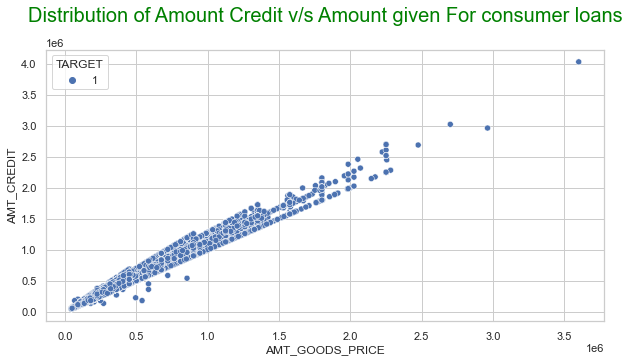

In [79]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="AMT_GOODS_PRICE",data=new2,hue="TARGET",y="AMT_CREDIT")
plt.title("Distribution of Amount Credit v/s Amount given For consumer loans\n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

>Analyse both visualizations there is some gap between them But Overall in Both Scenario the payments of Amount Goods Price and Amount Credit both have some Payments Difficulties.


### Now Importing the previousapplication data set for Analaysing

In [80]:
#importing dataset 2 as given by name as previousapplication
previousapplication=pd.read_csv("previous_application.csv")

### Cheking Duplicate Value

In [81]:
#cheking duplicate Values
previousapplication.duplicated().any()

False

In [82]:
previousapplication.head(4) #checkin the top five data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0


### Checking the Statstical Information 

In [83]:
previousapplication.describe()#checking the statstical information of Numerical data

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [84]:
previousapplication.describe(include="object")#checking the statstical information of categorical data

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
count,1670214,1670214,1670214,1670214,1670214,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1669868
unique,4,7,2,25,4,4,9,7,4,28,5,3,8,11,5,17
top,Cash loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,XNA,XNA,Cash
freq,747553,255118,1661739,922661,1036781,1033552,1353093,508970,1231261,950809,691011,1063666,719968,855720,517215,285990


### Checking the Information of DataSet

In [85]:
previousapplication.info() #checking the Information  of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Impute/Remove missing values 

#### Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).

In [86]:
(previousapplication.isnull().mean()*100).sort_values(ascending=False) #checking the missing values in percentage

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [87]:
#removing those columns who have more than 40% missing value 
Null_val=previousapplication.columns[previousapplication.isnull().mean()>=0.4]

In [88]:
previousapplication=previousapplication.drop(Null_val,axis=1)

In [89]:
previousapplication.shape # after removing the missing values now checking the shape 

(1670214, 26)

In [90]:
#some imputation is going to this columns like,,median,,mean etc...
(previousapplication.isnull().mean()*100).sort_values(ascending=False).head(5).to_frame()

,0
AMT_GOODS_PRICE,23.081773
AMT_ANNUITY,22.286665
CNT_PAYMENT,22.286366
PRODUCT_COMBINATION,0.020716
AMT_CREDIT,0.000060


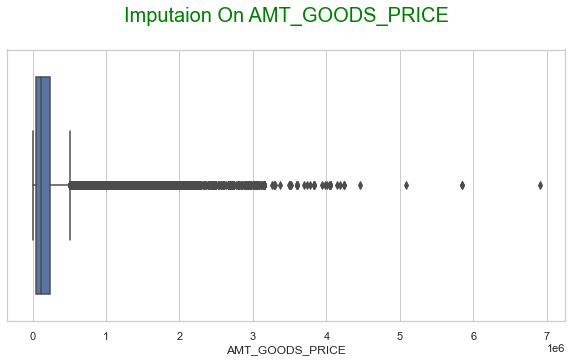

In [91]:
#imputaion on AMT_GOODS_PRICE columns
plt.figure(figsize=(10,5))
sns.boxplot(previousapplication.AMT_GOODS_PRICE)
plt.title("Imputaion On AMT_GOODS_PRICE\n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [92]:
previousapplication.AMT_GOODS_PRICE.median() #here outliers is found replace median in the place of missing value

112320.0

In [93]:
previousapplication.AMT_GOODS_PRICE=previousapplication.AMT_GOODS_PRICE.fillna("112320.0")

In [94]:
previousapplication.AMT_GOODS_PRICE.isnull().sum()

0

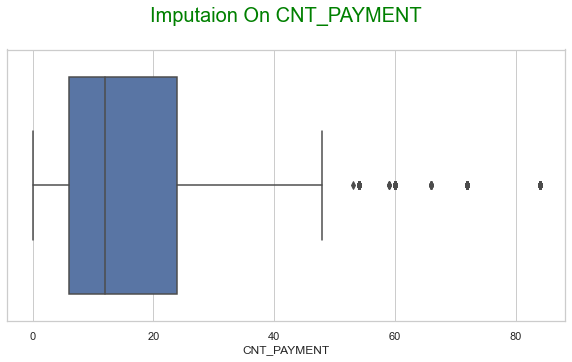

In [95]:
#imputaion on CNT_PAYMENT columns
plt.figure(figsize=(10,5))
sns.boxplot(previousapplication.CNT_PAYMENT)
plt.title("Imputaion On CNT_PAYMENT\n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [96]:
previousapplication.CNT_PAYMENT.median() #here outliers is found replace median in the place of missing value

12.0

In [97]:
previousapplication.CNT_PAYMENT=previousapplication.CNT_PAYMENT.fillna("12.0")

In [98]:
previousapplication.CNT_PAYMENT.isnull().sum()

0

### Univariate Analysis on Column NAME_CONTRACT_TYPE & NAME_CONTRACT_STATUS


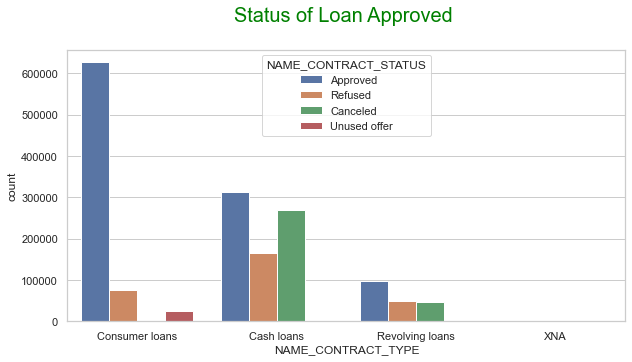

In [99]:
plt.figure(figsize=(10,5))
sns.countplot(x="NAME_CONTRACT_TYPE",data=previousapplication,hue="NAME_CONTRACT_STATUS")
plt.title("Status of Loan Approved \n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

>Here we can see that the consumer loans has been approved more than the others in cash loans the loan has 
refeused in large quantity


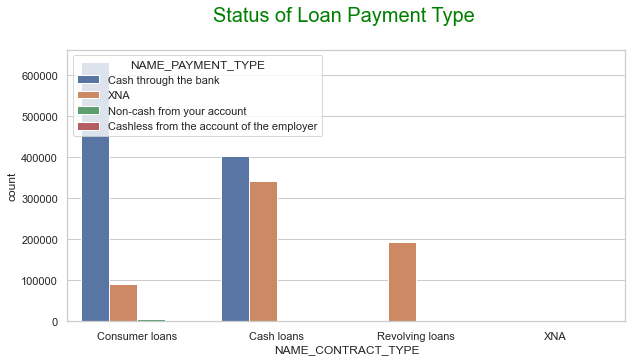

In [100]:
plt.figure(figsize=(10,5))
sns.countplot(x="NAME_CONTRACT_TYPE",data=previousapplication,hue="NAME_PAYMENT_TYPE")
plt.title("Status of Loan Payment Type \n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

>Here we can see that the loan amount payment is done from mostly in cash..
> in bussiness purpose look into the cashless segement

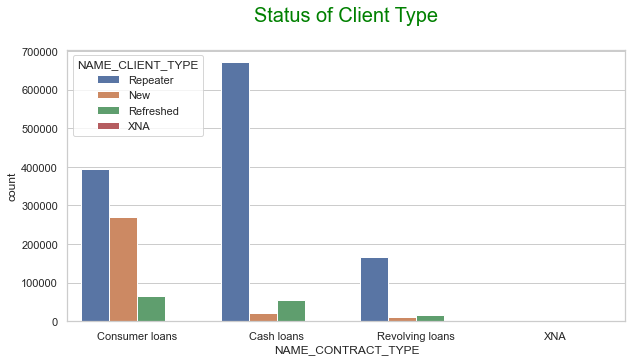

In [101]:
plt.figure(figsize=(10,5))
sns.countplot(x="NAME_CONTRACT_TYPE",data=previousapplication,hue="NAME_CLIENT_TYPE")
plt.title("Status of Client Type\n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

>In Cash Segment Repeater client(means those client who have already a loan) is more New client is also came in consumer loans


In [102]:
#Getting the top 10 correlation PreviousApplication
correlation_3 = previousapplication.corr().abs().unstack().sort_values(ascending=False).dropna()
correlation_3
correlation_3 = correlation_3[correlation_3 != 1.0]
correlation_3.head(10).to_frame().reset_index()

,level_0,level_1,0
0,AMT_CREDIT,AMT_APPLICATION,0.975824
1,AMT_APPLICATION,AMT_CREDIT,0.975824
2,AMT_CREDIT,AMT_ANNUITY,0.816429
3,AMT_ANNUITY,AMT_CREDIT,0.816429
4,AMT_APPLICATION,AMT_ANNUITY,0.808872
5,AMT_ANNUITY,AMT_APPLICATION,0.808872
6,DAYS_DECISION,AMT_ANNUITY,0.279051
7,AMT_ANNUITY,DAYS_DECISION,0.279051
8,DAYS_DECISION,AMT_CREDIT,0.133763
9,AMT_CREDIT,DAYS_DECISION,0.133763


>Here  values are between 0 and 1 they are showing strong relationship  

### Using Pairplot to Perform Bivariate Analysis on Numerical Columns
**AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS**

<Figure size 1440x576 with 0 Axes>

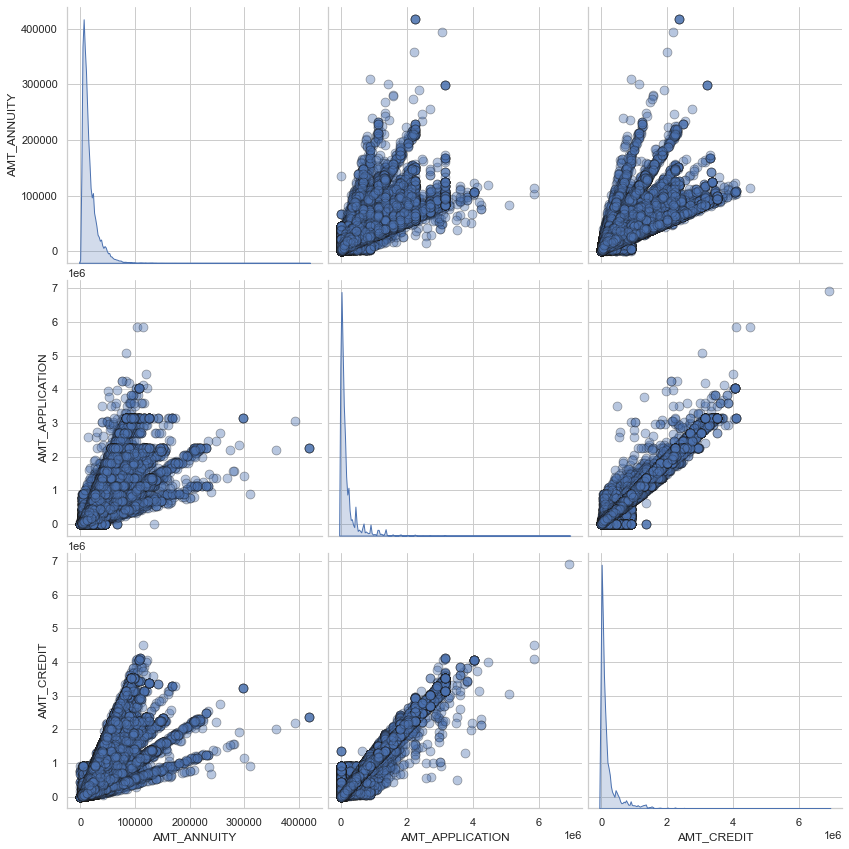

In [103]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(previousapplication[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

> 1. Annuity of previous application has a very high and positive influence over: (Increase of annuity increases below factors) <br>(1) How much credit did client asked on the previous application <br> (2)Final credit amount on the previous application that was approved by the bank <br>(3) Goods price of good that client asked for on the previous application.<br><br>
>2. For how much credit did client ask on the previous application is highly influenced by the Goods price of good that client has asked for on the previous application<br><br>
>3. Final credit amount disbursed to the customer previously, after approval is highly influence by the application amount and also the goods price of good that client asked for on the previous application.

### Bivariate Analysis on Categorical vs Numeric columns

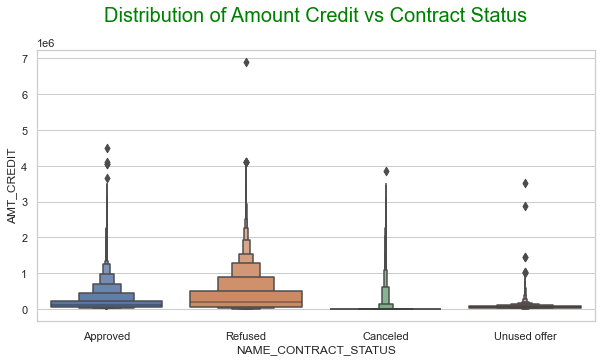

In [104]:
#Analysis NAME_CONTRACT_STATUS and AMT_CREDIT colnm.
plt.figure(figsize=(10,5))
sns.boxenplot(x="NAME_CONTRACT_STATUS",data=previousapplication,y="AMT_CREDIT") 
plt.title("Distribution of Amount Credit vs Contract Status\n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()


>We can infer that when the AMT_CREDIT is too low, it get's cancelled/unused most of the time.

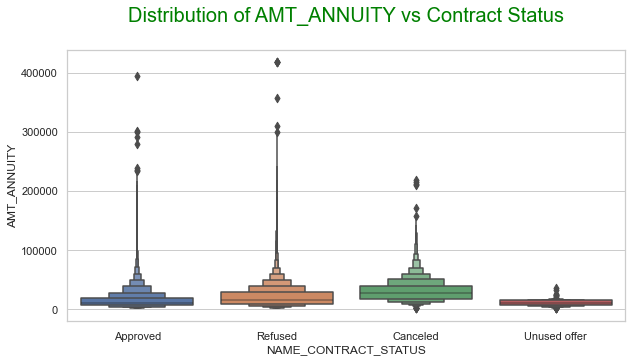

In [105]:
#Analysis NAME_CONTRACT_STATUS and AMT_ANNUITY colnm.
plt.figure(figsize=(10,5))
sns.boxenplot(x="NAME_CONTRACT_STATUS",data=previousapplication,y="AMT_ANNUITY") 
plt.title("Distribution of AMT_ANNUITY vs Contract Status\n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

>Approve Loan on based on criteria but also refused a lot of loan applications and cancelled also


### Merging the Files and Analyzing the Data

In [106]:
## Merging the two files to do some analysis
combine_data=NewApplication_Final.merge(previousapplication,on="SK_ID_CURR",how="left")

In [107]:
combine_data.shape #checking the number of rows and columns

(1430100, 53)

In [108]:
combine_data.duplicated().any() #checking duplicates in dataset

False

In [109]:
combine_data.info() # checking information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430100 entries, 0 to 1430099
Data columns (total 53 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1430100 non-null  int64   
 1   TARGET                       1430100 non-null  int64   
 2   CODE_GENDER                  1430100 non-null  object  
 3   FLAG_OWN_CAR                 1430100 non-null  object  
 4   FLAG_OWN_REALTY              1430100 non-null  object  
 5   AMT_CREDIT_x                 1430100 non-null  float64 
 6   AMT_INCOME_TOTAL             1430100 non-null  float64 
 7   CREDIT_INCOME_RATIO          1430100 non-null  float64 
 8   NAME_INCOME_TYPE             1430100 non-null  object  
 9   NAME_EDUCATION_TYPE          1430100 non-null  object  
 10  NAME_FAMILY_STATUS           1430100 non-null  object  
 11  NAME_HOUSING_TYPE            1430100 non-null  object  
 12  DAYS_EMPLOYED               

In [110]:
combine_data.describe() ##checking the statstical information of Numerical data

,SK_ID_CURR,TARGET,AMT_CREDIT_x,AMT_INCOME_TOTAL,CREDIT_INCOME_RATIO,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_ANNUITY_x,REGION_RATING_CLIENT,AMT_GOODS_PRICE_x,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
count,1.430100e+06,1.430100e+06,1.430100e+06,1.430100e+06,1.430100e+06,1.430100e+06,1.430100e+06,1.430100e+06,1.430098e+06,1.430100e+06,1.264288e+06,1.264288e+06,1.264288e+06,1.430007e+06,1.430100e+06,1.428881e+06,1.413646e+06,1.106438e+06,1.413646e+06,1.413645e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06
mean,2.784722e+05,8.624572e-02,5.893453e+05,1.736029e+05,3.772136e+00,6.860483e+04,-5.001351e+03,7.196070e-02,2.148979e+00,2.036175e+00,6.878180e-03,2.999783e-01,3.585109e-01,2.704227e+04,2.058179e+00,5.294441e+05,1.922738e+06,1.583715e+04,1.752422e+05,1.963529e+05,1.247887e+01,9.964319e-01,-8.803712e+02,3.149935e+02
std,1.028024e+05,2.807266e-01,3.874256e+05,1.983338e+05,2.612954e+00,1.451988e+05,3.551647e+03,2.584229e-01,9.001480e-01,4.891629e-01,1.077050e-01,9.789132e-01,9.221012e-01,1.404019e+04,4.963510e-01,3.557892e+05,5.327159e+05,1.472502e+04,2.936238e+05,3.194835e+05,3.331485e+00,5.962675e-02,7.835434e+02,7.695231e+03
min,1.000020e+05,0.000000e+00,4.500000e+04,2.565000e+04,0.000000e+00,-1.791200e+04,-2.467200e+04,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.615500e+03,1.000000e+00,4.050000e+04,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00
25%,1.893620e+05,0.000000e+00,2.700000e+05,1.125000e+05,2.000000e+00,-2.825000e+03,-7.509000e+03,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.679850e+04,2.000000e+00,2.385000e+05,1.461337e+06,6.257700e+03,1.975050e+04,2.487870e+04,1.000000e+01,1.000000e+00,-1.313000e+03,-1.000000e+00
50%,2.789560e+05,0.000000e+00,5.084955e+05,1.575000e+05,3.000000e+00,-1.277000e+03,-4.506000e+03,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.491650e+04,2.000000e+00,4.500000e+05,1.922686e+06,1.122354e+04,7.087050e+04,8.059500e+04,1.200000e+01,1.000000e+00,-5.820000e+02,4.000000e+00
75%,3.675120e+05,0.000000e+00,8.086500e+05,2.115000e+05,5.000000e+00,-2.820000e+02,-1.997000e+03,0.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.457350e+04,2.000000e+00,6.795000e+05,2.384010e+06,2.041968e+04,1.800000e+05,2.156400e+05,1.500000e+01,1.000000e+00,-2.710000e+02,8.500000e+01
max,4.562550e+05,1.000000e+00,4.050000e+06,1.170000e+08,8.500000e+01,3.652430e+05,0.000000e+00,1.000000e+00,2.000000e+01,3.000000e+00,9.000000e+00,2.700000e+01,2.610000e+02,2.580255e+05,3.000000e+00,4.050000e+06,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06


In [111]:
NewDat=combine_data.pivot_table(index="FLAG_OWN_CAR",columns="NAME_CONTRACT_STATUS",values='SK_ID_CURR',aggfunc='mean')

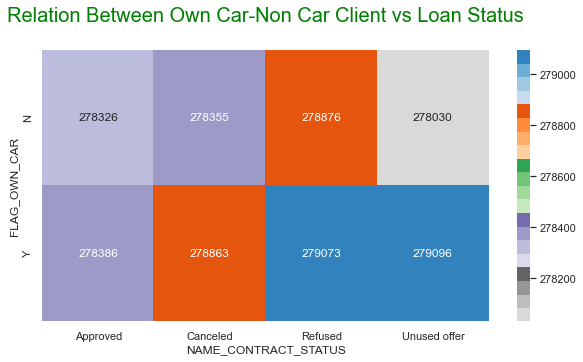

In [112]:
plt.figure(figsize=(10,5))
sns.heatmap(NewDat,annot=True,fmt="1g",cmap="tab20c_r")
plt.title("Relation Between Own Car-Non Car Client vs Loan Status\n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

> We see that car ownership doesn't have any effect on application approval or rejection. But we saw earlier that the people who has a car has lesser chances of default. The bank can add more weightage to car ownership while approving a loan amount

In [113]:
NewDat1=combine_data.pivot_table(index="CODE_GENDER",columns="NAME_CONTRACT_STATUS",values='SK_ID_CURR',aggfunc='mean')

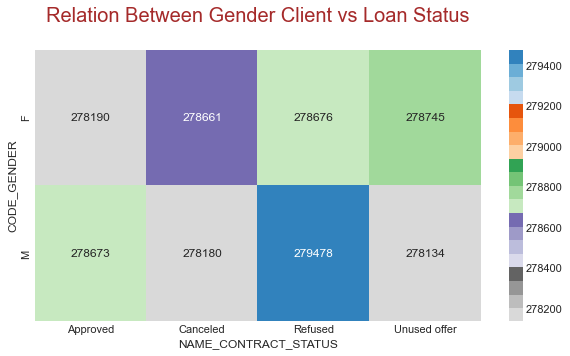

In [114]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')
sns.heatmap(NewDat1,annot=True,fmt="1g",cmap="tab20c_r")
plt.title("Relation Between Gender Client vs Loan Status\n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

> We see that code gender doesn't have any effect on application approval or rejection. 
> <br>But we saw earlier that female have lesser chances of default compared to males. The bank can add more weightage to female while approving a loan amount.

In [115]:
NewDat3=combine_data.pivot_table(index="TARGET",columns="NAME_CONTRACT_STATUS",values='SK_ID_CURR',aggfunc='mean')

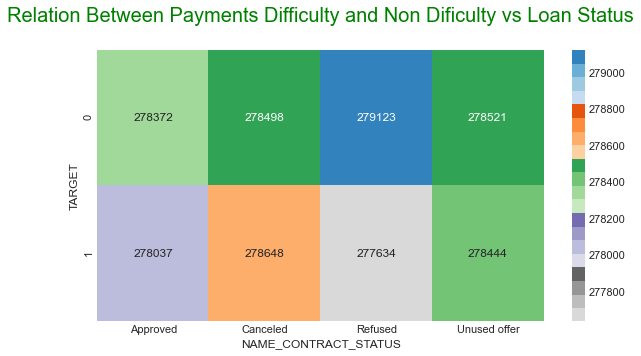

In [116]:
plt.figure(figsize=(10,5))
sns.heatmap(NewDat3,annot=True,fmt="1g",cmap="tab20c_r")
plt.title("Relation Between Payments Difficulty and Non Dificulty vs Loan Status\n",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

>We can see that the people who were approved for a loan earlier, defaulted less often where as people who were refused a loan earlier have higher chances of defaulting. 

 **Target variable (0 - Payments Not Difficulty 1 - Payments Difficulty )**